In [1]:
import yfinance as yf
import numpy as np
import talib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[*********************100%***********************]  1 of 1 completed
Stock name: SC-USD
Start: 2021-01-22 18:30:00+00:00, End: 2021-03-22 15:00:00+00:00
Training data: 1322 
Tsesting data: 1322 


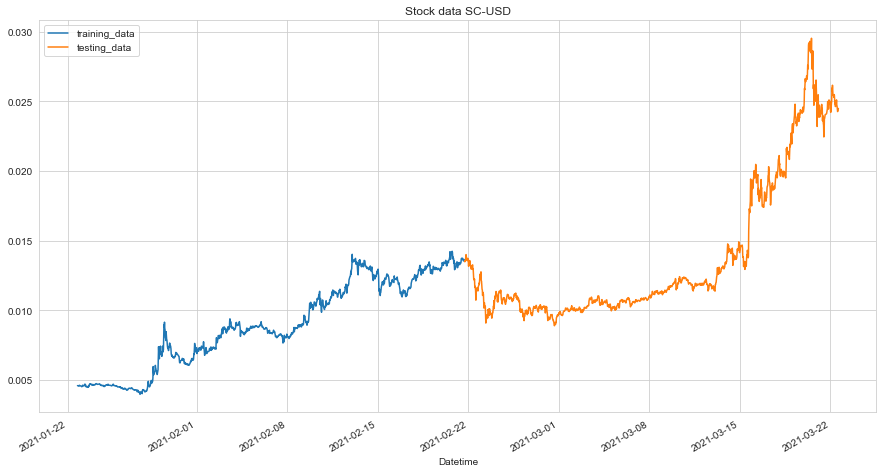

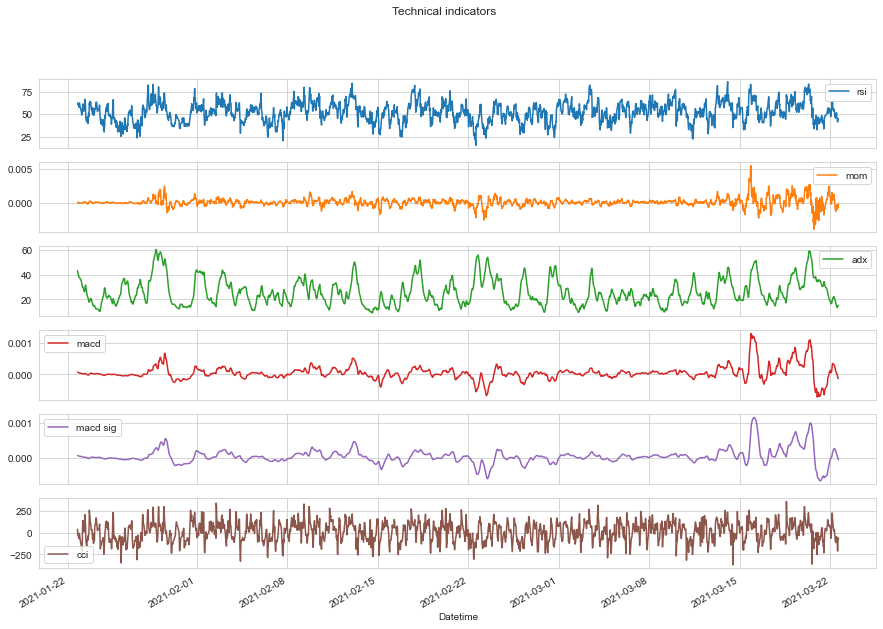

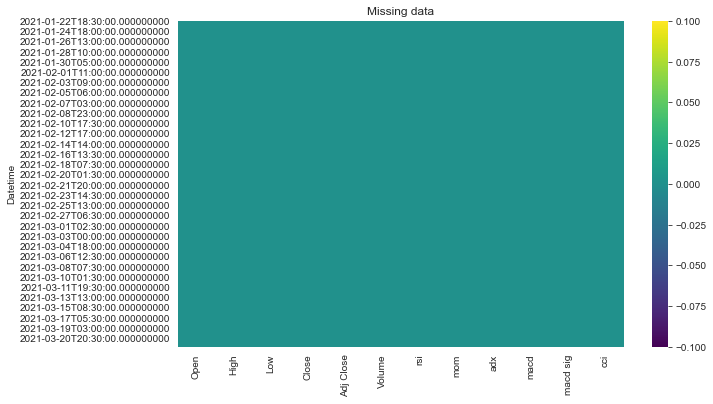

,Open,High,Low,Close,Adj Close,Volume,rsi,mom,adx,macd,macd sig,cci
Datetime,,,,,,,,,,,,
2021-01-22 18:30:00+00:00,0.004632,0.004667,0.004598,0.004604,0.004604,786847.0,62.552105,0.000055,43.436491,0.000071,0.000071,41.626110
2021-01-22 19:00:00+00:00,0.004604,0.004606,0.004570,0.004602,0.004602,164919.0,62.253280,0.000076,42.212847,0.000066,0.000070,-5.568644
2021-01-22 19:30:00+00:00,0.004593,0.004596,0.004576,0.004590,0.004590,62156.0,60.755173,0.000027,41.076606,0.000061,0.000068,-25.005994
2021-01-22 20:00:00+00:00,0.004589,0.004612,0.004579,0.004598,0.004598,139751.0,61.427671,-0.000041,40.230723,0.000056,0.000066,-20.575330
2021-01-22 20:30:00+00:00,0.004598,0.004603,0.004574,0.004588,0.004588,45544.0,60.074728,-0.000041,39.318661,0.000051,0.000063,-47.810347


In [4]:
stock_name = 'sc-usd'.upper()
stock_data = yf.download(stock_name, period='60d', interval='30m');
stock_data['Volume'] = stock_data['Volume'].apply(lambda vol: np.NaN if vol == 0 else vol)
stock_data.dropna(axis=0, inplace=True)
stock_data['rsi'] = talib.RSI(stock_data['Close'])
stock_data['mom'] = talib.MOM(stock_data['Close'])
stock_data['adx'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'])
stock_data['macd'], stock_data['macd sig'], _ = talib.MACD(stock_data['Close'])
stock_data['cci'] = talib.CCI(stock_data['High'], stock_data['Low'], stock_data['Adj Close'])
stock_data.dropna(axis=0, inplace=True)

n_train = len(stock_data)//2
train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]


print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom', 'adx', 'macd', 'macd sig', 'cci']].plot(subplots=True, figsize=(15,10), title='Technical indicators');
plt.show()


plt.figure(figsize=(10,6))
sns.heatmap(stock_data.isnull(), cmap='viridis');
plt.title('Missing data');
plt.show()

stock_data.head()

In [5]:
stock_data.to_csv(stock_name+'.csv')